# Optimisation

We set out to achieve the following,

1.   Implementing the optimisation algorithms listed below:
     
    *   Gradient Descent Method
    *   Gradient Descent Method with Momentum
    *   Newton's Method


2.   Comparing the convergence of the implemented algorithms.

3.   Understanding how the convergence of the algorithms depends on the condition number of the problem.

We consider the following problems

1.   Describe linear regression  as an ordinary least squares (OLS)  problem and formulate it as a  quadratic optimization model  in matrix form

2.   Show the  convexity of the objective function of the OLS problem

3.   Solve the OLS problem by implementing the following algorithms:
    
    *   Gradient Descent Method
    *   Gradient Descent Method with Momentum
    *   Newton's Method

4.   Visualize the learned models in two and three dimensions


5.   Implement a method to generate a matrix $A$ with a certain condition
number

6.   Understand how the condition number of a problem has an impact on the convergence of the algorithms


## Linear Regression

### Fundamentals

Let us suppose that we would like to predict the price of a house. Inputs are the age of the building, total area, garage quality, and other information—that we believe affect a house’s worth. The output is the price of the house.  Such problems where the output is a number are regression problems.

The regression problem where the numeric outcome is predicted through an affine function is called linear regression.

 $(a^i,b^i)_{i \in \{1,\dotsc,m\}}$ where 

- $m \in \mathbb{N}$ is the *number* of samples in the dataset

- $n \in \mathbb{N}$ is the number of features

- $a^i \in \mathbb{R}^n$  is an $n$ dimensional input vector for the $i^{\textit{th}}$ sample

- $b^i \in \mathbb{R}$ is the numeric output value associated with sample $i$

 Output: The goal in linear regression is to  fit a hyperplane that explains the data most. In other words, we would like to estimate $x := (x_0, x_1, \dotsc, x_n)$ (one coefficient for each feature plus a constant!) that

- predicts a new sample $b^{m+1}$ with $\displaystyle b^{m+1}=x_0 + \sum_{i=1}^n x_i a_i^{m+1}$
    
- minimizes the objective function of the form $\displaystyle \frac{1}{2m}\sum_{i=1}^m \bigg(b^i-\Big(x_0 + \sum_{i=1}^n x_i a_i^{m+1}\Big)\bigg)^2$ **(OLS problem)**

### OLS in Matrix Form

Let us construct the input matrix $A$, output vector $b$, and the coefficient vector $x$, respectively as following:

\begin{align}
A=\begin{bmatrix} 
1& a^1_{1} & \dots  & a^1_{n}\\
\vdots & \vdots & \ddots & \vdots\\
1& a^m_{1} & \dots  & a^m_{n} 
\end{bmatrix}_{m\times(n+1)}, \quad b=\begin{bmatrix} b^1 \\ \vdots \\ b^m \end{bmatrix}_{m \times 1}, \quad x=\begin{bmatrix} x_0, \\ x_1 \\ \vdots \\ x_{n+1} \end{bmatrix}_{(n+1) \times 1}
\end{align} 

Then, OLS in matrix form can be formalized as the following quadratic optimization problem:

\begin{align}
\underset{x}{\min} f(x) := \frac{1}{2m}||Ax-b||_2^2 \quad (1)
\end{align}

### Convexity of OLS

 Preposition 1: $f(x)$ is a convex function.

 Proof:

\begin{align}
f(x) &= \frac{1}{2m}||Ax-b||_2^2 \\
     &= \frac{1}{2m} (Ax-b)^T (Ax-b)\\
     &= \frac{1}{m}\bigg[\frac{1}{2} (Ax)^T (Ax) - (Ax)^T b + \frac{1}{2}b^T b\bigg]\\
\nabla f(x) &= \frac{1}{m}\bigg[A^T A x - A^T b\bigg] \\
\nabla^2 f(x) &= \frac{1}{m}A^T A
\end{align}

Since $m \in \mathbb{N}$, it is enough to show that $A^T A$ is a positive semidefinite matrix. For any vector $v \in \mathbb{R}^{n+1}$, we have $v^T A^T A v = (Av)^T (Av) = ||Av||_2^2 \geq 0$, which completes the proof.

## Algorithms

### Fundamentals

Three algorithms that we are going to implement today are so-called iterative algorithms. They generate a sequence of points $x^0, x^1, \dotsc$ in $\mathbb{R}^n$ in the hope that this sequence will converge to a local minimizer. In our case, it converges to a global minimizer as we have a convex optimization problem by Proposition 1 A typical rule for generating such a sequence would be to start with a vector $x^0$, and then for $k \geq 0$, move from iteration $k$ to $k+1$ by

\begin{align}
x^{k+1} = x^k + \alpha_k d_k
\end{align}

in a way that we ensure $f(x^{k+1})\leq f(x^k)$. The parameter $\alpha_k \in \mathbb{R}$ is called the step length, while $d_k \in \mathbb{R}^n$ is the search direction.

#### Gradient Descent and Newton's Method

There are many ways in which the direction $d_k$ can be chosen. If we have

\begin{align}
d_k = - \nabla f(x^k)
\end{align}

then we take a step in the direction of steepest descent and the method is called gradient descent. If there is second-order information available, then we can take steps of the form

\begin{align}
d_k = - \nabla^2 f(x^k)^{-1} \nabla f(x^k)
\end{align}

The resulting method is called Newton's method. If applicable, Newton's method tends to converge faster to a solution, but the computation at each step is more expensive.

#### Gradient Descent with Momentum

Unlike the first two algorithms, this method carries over some momentum from previous iterations: Instead of only taking into account the current iterations, the gradient step is based on a combination current and previous steps. In this setting, we update $x^{k+1}$ by 

\begin{align}
x^{k+1} = x^k + \alpha_k \theta_k
\end{align}
where

\begin{align}
\theta_k = -\Big(\nabla f(x^k)+\beta \theta_{k-1}\Big)
\end{align}

### Implementation

Let's first start with importing the libraries that we are going to utilize on the way

In [1]:
from copy import deepcopy as c  # for the cases where we need to allocate new memory
from mpl_toolkits.mplot3d import Axes3D  # required for 3D visualization
from scipy.stats import ortho_group  # to generate random orthogonal matrices
import matplotlib.pyplot as plt  # for plotting
from numpy.linalg import inv  # to take inverse of a given matrix
import numpy as np  # for array operations
np.random.seed(1234)  # used to replicate the same results each time!
import random # for random number generations outside of numpy
random.seed(1234) # again, used to replicate the same results each time!
np.set_printoptions(suppress=True)

We can now define the functions to be used later in the implementation

In [2]:
def predict(A,x):
    '''
    Returns the predictions for a given 
    input matrix A and coefficients x

    @params:
    -------
    A: 2D numpy array with dim (n_sample, n_feature+1)
    x: 1D numpy array with dim (n_feature+1, 1)

    @return:
    --------
    1D numpy array with dim (n_sample, 1)
    '''
    return np.dot(A, x)

In [3]:
def get_obj_value(A,b,x):
    '''
    Returns the objective function value for a given 
    input matrix A, an output vector b, and coefficients x

    @params:
    --------
    A: 2D numpy array with dim (n_sample, n_feature+1)
    b: 1D numpy array with dim (n_sample, 1)
    x: 1D numpy array with dim (n_feature+1, 1)

    @return:
    -------
    float scalar
    '''
    m = b.shape[0] # extracts the number of samples in the problem
    b_hat = predict(A,x) # produces the predictions
    return (1/(2*m)) * np.sum(np.square(b_hat - b)) # computes and returns the OLS objective function value

We then create a class called Optimizer from which the classes designed for each algorithm are inherited

In [4]:
class Optimizer:
    
    '''
    It is the class from which classes associated with each algorithm
    is inherited. This includes the common attributes and functions
    shared by all algorithms. 
    '''

    def __init__(self, A, b, alpha, x0=None, tolerence=1e-6):

        '''
        % contructor

        @params:
        --------
        A: 2D numpy array with dim (n_sample, n_feature)
        b: 1D numpy array with dim (n_sample, 1)
        alpha: float
        x0 (optional): 1D numpy array with dim (n_feature+1, 1)
        tolerence (optional): float
        '''

        self.A_original = A # let's keep it for the sake of visualization
        self.b = b
        self.n_sample, self.n_feature = A.shape # extract the dimensions
        self.A = np.c_[np.ones((self.n_sample,1)), A]  # modified A matrix with 1 vector as the first column!
        self.alpha = alpha
        self.ToL = tolerence

        # algorithms are initialized with 0 vector if there is 
        # no initial point passed as an argument!
        if x0 is not None:
            self.x = x0
        else:
            self.x = np.zeros((self.n_feature+1, 1)) # 1D with dim (n_feature+1, 1)
        
        # algorithm history
        self.obj_history = [get_obj_value(self.A, self.b, self.x)]
        self.x_history = [self.x]

    def plot_learned_model(self, algorithm_name):
        
        '''
        Visualizes the learned model so that 
        if n=1, it shows the fitted line
        if n=2, it shows the fitted hyperplane
        otherwise, it gives us an error.
        '''
        
        if self.n_feature > 2:
            raise ValueError('You can visualize only in 2D and 3D!')
        
        if self.n_feature == 1:  
            b_hat = predict(self.A, self.x)
            fig, ax = plt.subplots(figsize=(8, 4))
            ax.plot(self.A_original, b_hat, color='k', label='Learned Model')
            ax.scatter(self.A_original, self.b, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
            ax.set_ylabel('Predicted Value', fontsize=13)
            ax.set_xlabel('Feature Value', fontsize=13)
            ax.legend(facecolor='white', fontsize=11)
            ax.set_title(f'Learned Model with {algorithm_name}', fontsize=15)
            fig.tight_layout()
        
        elif self.n_feature == 2:
            # prepare model data point for visualization
            x1 = self.A_original[:, 0]
            x2 = self.A_original[:, 1]
            x3 = self.b.reshape((self.n_sample, ))

            x1_ = np.linspace(np.min(x1), np.max(x1), 30)   # range of x
            x2_ = np.linspace(np.min(x2), np.max(x2), 30)  # range of y
            xx_pred, yy_pred = np.meshgrid(x1_, x2_)
            model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
            model_viz_b = np.c_[np.ones((model_viz.shape[0],1)), model_viz]
            
            # get response
            response = predict(model_viz_b, self.x)
            
            # plot
            plt.style.use('default')

            fig = plt.figure(figsize=(12, 4))

            ax1 = fig.add_subplot(131, projection='3d')
            ax2 = fig.add_subplot(132, projection='3d')
            ax3 = fig.add_subplot(133, projection='3d')

            axes = [ax1, ax2, ax3]
            
            for ax in axes:
                ax.plot(x1, x2, x3, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
                ax.scatter(xx_pred.flatten(), yy_pred.flatten(), response, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
                ax.set_xlabel('Feature 1', fontsize=12)
                ax.set_ylabel('Feature 2', fontsize=12)
                ax.set_zlabel('Prediction', fontsize=12)
                ax.locator_params(nbins=4, axis='x')
                ax.locator_params(nbins=5, axis='x')
            
            ax1.view_init(elev=28, azim=120)
            ax2.view_init(elev=4, azim=114)
            ax3.view_init(elev=60, azim=165)

            fig.suptitle(f'Learned Model with {algorithm_name}', fontsize=15)
            fig.tight_layout()

We can now introduce the classes one by one for each algorithm.

In [5]:
class GradientDescent(Optimizer):

    def __init__(self, A, b, learning_rate):
        '''
        % contructor

        @params:
        --------
        A: 2D numpy array with dim (n_sample, n_feature)
        b: 1D numpy array with dim (n_sample, 1)
        learning_rate: float
        '''
        super().__init__(A, b, learning_rate) # inherited from class 'Optimizer'
        self.algorithm_name = 'Gradient Descent'
    
    def run(self):

        n_iter = 0
        while True: # we keep going until we meet the convergence criteria!
            x_old = c(self.x) # you should be familiar with why we need "deep copy" instead of "shallow copy"
            b_hat = predict(self.A, self.x) # make predictions based on the current x
            self.x -= (1/self.n_sample) * self.alpha * self.A.T.dot((b_hat-self.b)) # x^{k+1} <- x^k+\alpha_k gradient_k(x^k)
            self.obj_history.append(get_obj_value(self.A, self.b, self.x)) # history update
            self.x_history.append(self.x) # history update
            n_iter += 1
            # convergence check
            if np.sum(abs(self.x - x_old)) <= self.ToL:
                print(f'{self.algorithm_name} has converged in {n_iter} iterations')
                break
    
    def plot_learned_model(self):
        # inherited from 'Optimizer' class with the argument 'self.algorithm_name'
        super().plot_learned_model(self.algorithm_name)

In [6]:
class GradientDescentMomentum(Optimizer):

    def __init__(self, A, b, learning_rate, beta):
        '''
        % contructor

        @params:
        --------
        A: 2D numpy array with dim (n_sample, n_feature)
        b: 1D numpy array with dim (n_sample, 1)
        learning_rate: float
        beta: float

        # recall that beta was nothing but how much we put an importance to
        the theta value coming from the previous iteration!
        '''
        super().__init__(A, b, learning_rate) # inherited from class 'Optimizer'
        self.beta = beta
        self.algorithm_name = 'Gradient Descent Momentum'
    
    def run(self):

        n_iter = 0
        theta = np.zeros((self.n_feature + 1, 1))
        while True: 
            x_old = c(self.x)
            b_hat = predict(self.A, self.x)
            theta_old = c(theta)
            theta = (1/self.n_sample) * self.A.T.dot((b_hat-self.b)) + self.beta * theta_old
            self.x -= self.alpha * theta
            self.obj_history.append(get_obj_value(self.A, self.b, self.x))
            self.x_history.append(self.x)
            n_iter += 1
            if np.sum(abs(self.x - x_old)) <= self.ToL:
                print(f'{self.algorithm_name} has converged in {n_iter} iterations')
                break
    
    def plot_learned_model(self):
        super().plot_learned_model(self.algorithm_name)

Before writing the class implementing the  Newton's method , we consider the following proposition.

 Preposition 2:  In use of the OLS problem, Newton's method converges in a single step independent of the initial point $x^0$ when the step size is set to $1$.

 Proof:  We already know from Proposition 1 that
\begin{align}
\nabla f(x) &= \frac{1}{m}[A^T A x - A^T b]\\
\nabla^2 f(x) &= \frac{1}{m} A^T A
\end{align}

By inserting those gradient and Hessian computations into the update method of Newton's method, we get

\begin{align}
x^{k+1} &= x^k - m (A^T A)^{-1}\frac{1}{m}(A^T A x^k - A^Tb)\\
        &= (A^T A)^{-1} A^T b
\end{align}

This is the standard, closed form expression for the OLS coefficients. Therefore, no matter what we choose for the initial guess $x^0$, we'll have the correct solution at $x^1$ after a single iteration.

Furthermore, this is a stationary point. Notice that the expression for $x^{t+1}$ doesn't depend on $x^t$, so the solution won't change if we continue beyond one iteration. This indicates that Newton's method converges in a single step.



It is ideal that we are able to find $x^*$ in just one step. However, it does not necessarily mean that it is always computationally best algorithm as this single step consists of matrix inversion. For a $n \times n$ square matrix, the computational complexity of matrix inversion, by Coppersmith–Winograd algorithm, is $\mathcal{O}(n^{2.376})$.

----

In [7]:
class Newton(Optimizer):

    def __init__(self, A, b, learning_rate):
        '''
        % contructor

        @params:
        --------
        A: 2D numpy array with dim (n_sample, n_feature)
        b: 1D numpy array with dim (n_sample, 1)
        learning_rate: float
        '''
        super().__init__(A, b, learning_rate)
        self.algorithm_name = 'Newtons Method' # inherited from class 'Optimizer'
    
    def run(self):
        self.x = np.dot(np.matmul(inv(np.matmul(self.A.T,self.A)), self.A.T), self.b)
        self.x_history.append(self.x)
        self.obj_history.append(get_obj_value(self.A, self.b, self.x))
        print(f'{self.algorithm_name} has converged in 1 iterations')
        
    def plot_learned_model(self):
        super().plot_learned_model(self.algorithm_name)

We now have classes responsible for each of the algorithms we want to experiment with. As a next step, we generate two random samples with features one and two, respectively. The goal here is to visualize the learned model to get a sense of if we're implementing everything right. Next, we will continue with larger matrices to perform the experiments and analysis we desire.

Random sample with 1 Feature

Gradient Descent has converged in 4461 iterations
Newtons Method has converged in 1 iterations
Gradient Descent Momentum has converged in 4058 iterations

gd
[[6.659]
 [0.617]]
1.5701

newton
[[6.6594]
 [0.6169]]
1.5701

gdm
[[6.659]
 [0.617]]
1.5701


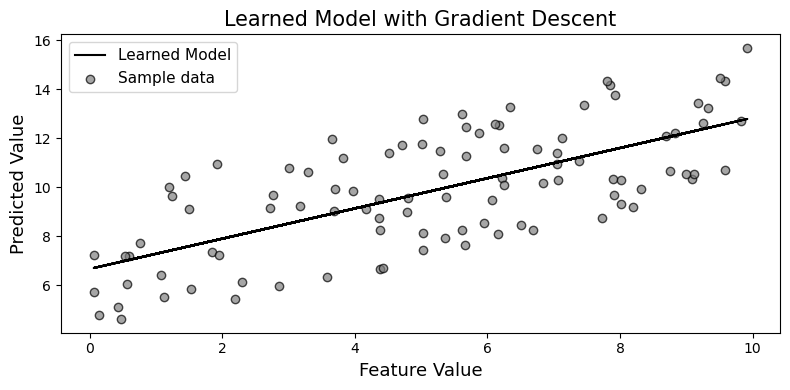

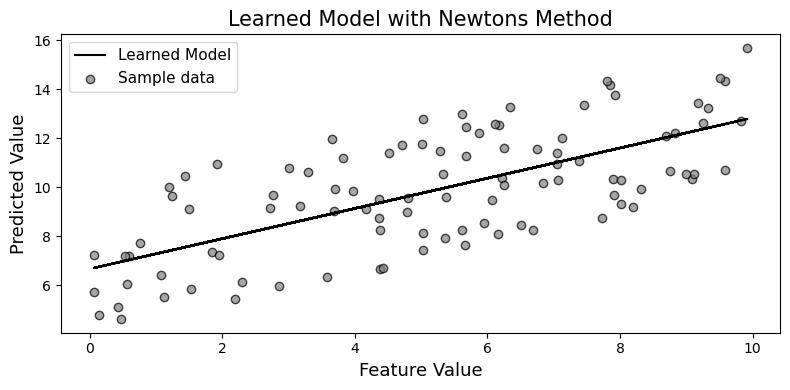

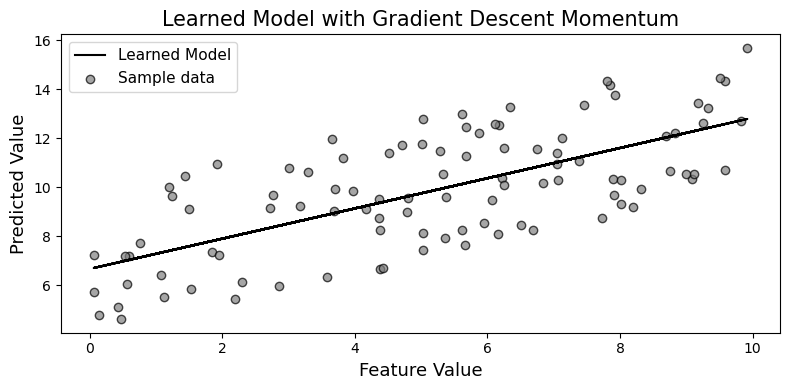

In [8]:
temp = np.random.rand(100,1)
A = 10 * temp
b = np.array([4 + 6 * (temp[i] + random.random()) for i in range(100)]).reshape((100,1))

gd = GradientDescent(A,b,0.01)
gd.run()
gd.plot_learned_model()

newton = Newton(A,b,0.01)
newton.run()
newton.plot_learned_model()

gdm = GradientDescentMomentum(A,b,0.01,beta=0.1)
gdm.run()
gdm.plot_learned_model()

print('\ngd')
print(np.around(gd.x_history[-1],4))
print(round(gd.obj_history[-1],4))

print('\nnewton')
print(np.around(newton.x_history[-1],4))
print(round(newton.obj_history[-1],4))

print('\ngdm')
print(np.around(gdm.x_history[-1],4))
print(round(gdm.obj_history[-1],4))

Random sample with 2 Features 

Gradient Descent has converged in 5798 iterations
Newtons Method has converged in 1 iterations
Gradient Descent Momentum has converged in 5650 iterations

gd
[[0.5248]
 [2.0205]
 [0.4688]]
0.0384

newton
[[0.5243]
 [2.0207]
 [0.469 ]]
0.0384

gdm
[[0.5248]
 [2.0205]
 [0.4688]]
0.0384


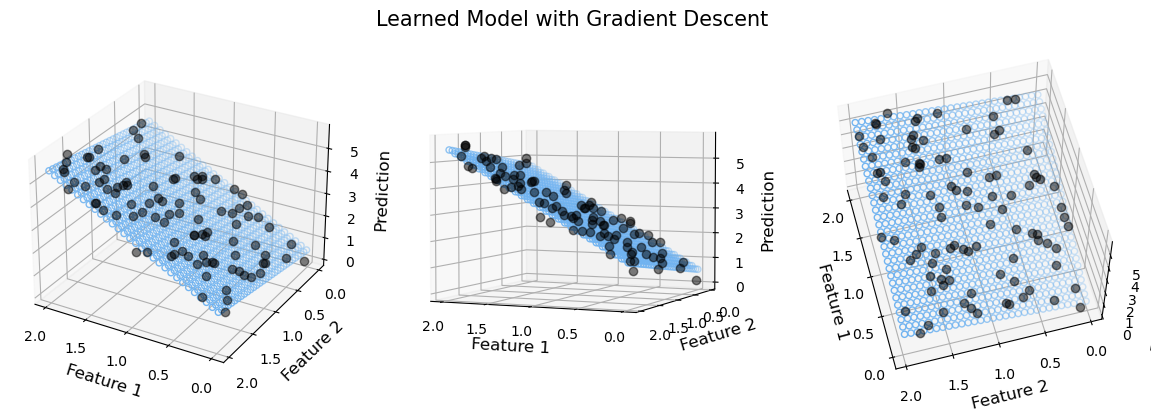

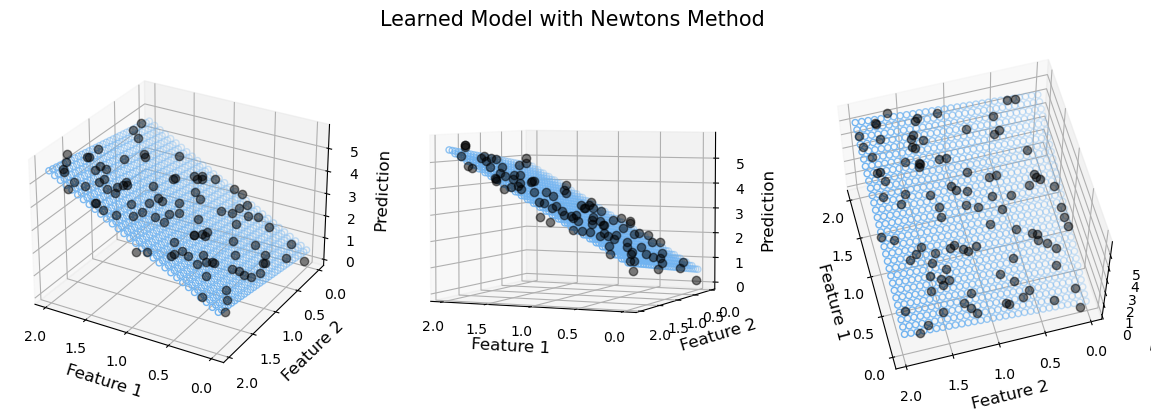

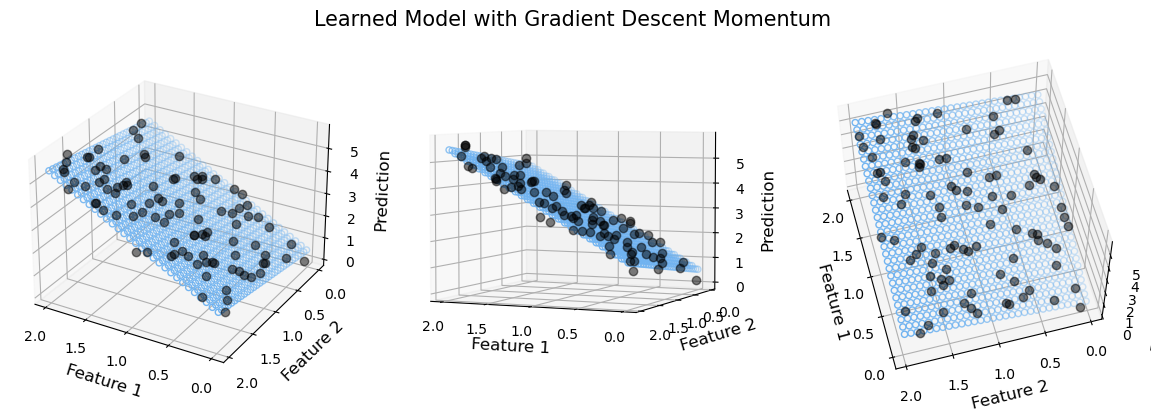

In [9]:
A = 2 * np.random.rand(100,2)
b = np.array([2*A[i][0] + 0.5 * A[i][1] + random.random() for i in range(100)]).reshape((100,1))

gd = GradientDescent(A,b,0.01)
gd.run()
gd.plot_learned_model()

newton = Newton(A,b,0.01)
newton.run()
newton.plot_learned_model()

gdm = GradientDescentMomentum(A,b,0.01, beta=0.03)
gdm.run()
gdm.plot_learned_model()

print('\ngd')
print(np.around(gd.x_history[-1],4))
print(round(gd.obj_history[-1],4))

print('\nnewton')
print(np.around(newton.x_history[-1],4))
print(round(newton.obj_history[-1],4))

print('\ngdm')
print(np.around(gdm.x_history[-1],4))
print(round(gdm.obj_history[-1],4))

Everything seems correct. Now, we are ready for experiments in larger dimensions. Towards that, we first introduce the concept of  condition number of a matrix , and then write a method to generate a random matrix with a desired condition number.

## Condition Number of a Matrix

A condition number for a matrix A, denoted by $\kappa(A)$, measures how sensitive the answer is to perturbations in the input data and to roundoff errors made during the solution process. It is computed by

\begin{align}
\kappa(A) = \sigma^{largest}/ \sigma^{smallest}
\end{align}

where $\sigma^{largest}$ and $\sigma^{smallest}$ represent the largest and smallest singular values, respectively.

In [10]:
def generate_matrix(n_row, n_column, condition_number):
    '''
    generates a matrix in dimension (n_row, n_column) with
    a desired condition number given by 'condition number'

    @params:
    --------
    n_row: int
    n_column:int
    condition number: float

    @return:
    --------
    2D numpy array
    '''
    U = ortho_group.rvs(dim=n_row)
    V = ortho_group.rvs(dim=n_column)
    min_sigma, max_sigma = 1, condition_number
    singular_values = np.random.uniform(low=min_sigma, high=max_sigma, size=(n_column,))
    singular_values[0] = min_sigma
    singular_values[1] = max_sigma
    S = np.zeros((n_row, n_column))
    np.fill_diagonal(S, singular_values)
    our_matrix = np.matmul(np.matmul(U, S), V)
    return our_matrix

we can validate our method using numpy linalg as follows:

In [11]:
temp_matrix = generate_matrix(n_row=100, n_column=20, condition_number=100)
print(round(np.linalg.cond(temp_matrix),2))

100.0


Let's see how condition number of a matrix has an impact on the convergence of algorithms.

$A$ with dimension (1000, 10)

In [12]:
A = generate_matrix(n_row=1000, n_column=10, condition_number=100)
b = np.random.uniform(size=(1000,1))

gd = GradientDescent(A,b,0.01)
gd.run()

gdm = GradientDescentMomentum(A,b,0.01, beta=0.2)
gdm.run()

Gradient Descent has converged in 120383 iterations
Gradient Descent Momentum has converged in 114159 iterations


As the condition number of $A$ increases, the problem will tend to be more  ill-conditioned. To see this, we carry out the same procedure with a new matrix with the same dimension but significantly larger condition number. Overflow run time warnings occur

In [13]:

A = generate_matrix(n_row=1000, n_column=10, condition_number=1000)

gd = GradientDescent(A,b,0.01)
gd.run()

gdm = GradientDescentMomentum(A,b,0.01, beta=0.03)
gdm.run()


c:\Users\44746\anaconda3\envs\mml\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\44746\AppData\Local\Temp\ipykernel_53644\3456893003.py:18: RuntimeWarning: overflow encountered in square
  return (1/(2*m)) * np.sum(np.square(b_hat - b)) # computes and returns the OLS objective function value


KeyboardInterrupt: 